In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plot
import process_emp as pe
import seaborn as sns
%matplotlib inline
sns.set(font='times new roman')
current_palette = sns.color_palette()
sns.set_palette([current_palette[2],current_palette[0], current_palette[1]])

In [2]:
def gen_frame():
    sheet_list= [0,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66]
    week_list=range(1,12)
    metro_names = ['US','San Francisco-Oakland-Berkeley, CA MSA','Washington-Arlington-Alexandria, DC-VA-MD-WV MSA', 'Atlanta-Sandy Springs-Alpharetta, GA MSA',
                   'Boston-Cambridge-Newton, MA-NH MSA','Detroit-Warren-Dearborn, MI MSA','Houston-The Woodlands-Sugar Land, TX MSA',
                   'Phoenix-Mesa-Chandler, AZ MSA','Miami-Fort Lauderdale-Pompano Beach, FL MSA','Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
                   'Riverside-San Bernadino-Ontario, CA MSA','Dallas-Fort Worth-Arlington, TX MSA','Chicago-Naperville-Elgin, IL-IN-WI MSA',
                   'New York-Newark-Jersey City, NY-NJ-PA','Seattle-Tacoma-Bellevue, WA MSA','Los Angeles-Long Beach-Anaheim, CA MSA']
    frame_list = []
    for sheets in sheet_list:
        frame_list.append(pe.process_emp(11,sheet_name=sheets))
        
    frame_dict = dict(zip(metro_names,frame_list))    
    return frame_dict

In [3]:
# we want to work with dataframes that have only the values that we are interested in
race_rows = ['Hispanic or Latino (may be of any race)','White alone, not Hispanic','Black alone, not Hispanic',
            'Asian alone, not Hispanic','Two or more races + Other races, not Hispanic']
income_rows = ['Less than \\$25,000', '\\$25,000 - \\$34,999',
               '\\$35,000 - \\$49,999', '\\$50,000 - \\$74,999', '\\$75,000 - \\$99,999',
               '\\$100,000 - \\$149,999', '\\$150,000 - \\$199,999', '\\$200,000 and above',]

income_dict = gen_frame()
race_dict = gen_frame()

for places in income_dict.keys():
    income_dict[places] = income_dict[places].loc[income_rows]
for places in race_dict.keys():
    race_dict[places] = race_dict[places].loc[race_rows]

In [18]:
race_dict['Washington-Arlington-Alexandria, DC-VA-MD-WV MSA']

,Total,"Household experienced loss of employment income since March 13, 2020","Household did not experience loss of employment income since March 13, 2020","Household did report loss of employment income since March 13, 2020",Household expects loss of employment income in next 4 weeks,Household does not expect loss of employment income in next 4 weeks,Household did not report expecting loss of employment income in next 4 weeks,"Total Experienced loss of employment income since March 13, 2020",Total Expected loss of employment income in next 4-weeks,"% Household experienced loss of employment income since March 13, 2020","% Household did not experience loss of employment income since March 13, 2020",% Household expects loss of employment income in next 4 weeks,% Household does not expect loss of employment income in next 4 weeks
Hispanic or Latino (may be of any race),552357,395044,157313,0,223032,325483,3842,496776,496776,0.795216,0.316668,0.448959,0.655191
"White alone, not Hispanic",2346629,798952,1503739,43938,487263,1832704,26662,2291048,2291048,0.348728,0.656354,0.212681,0.799941
"Black alone, not Hispanic",1176386,634280,536716,5390,494472,675231,6683,1120805,1120805,0.565915,0.478867,0.441176,0.602452
"Asian alone, not Hispanic",311590,161309,149476,806,130167,180617,806,256009,256009,0.630091,0.583870,0.508447,0.705510
"Two or more races + Other races, not Hispanic",134035,50029,78558,5448,43514,85074,5448,78454,78454,0.637686,1.001326,0.554643,1.084381


In [5]:
msa_dict = gen_frame()
for places in msa_dict.keys():
    msa_dict[places] = msa_dict[places].loc['Total']

msa_dframe = pd.DataFrame(msa_dict.values())
msa_dframe.index = ['US','San Francisco-Oakland-Berkeley, CA MSA','Washington-Arlington-Alexandria, DC-VA-MD-WV MSA', 'Atlanta-Sandy Springs-Alpharetta, GA MSA',
                   'Boston-Cambridge-Newton, MA-NH MSA','Detroit-Warren-Dearborn, MI MSA','Houston-The Woodlands-Sugar Land, TX MSA',
                   'Phoenix-Mesa-Chandler, AZ MSA','Miami-Fort Lauderdale-Pompano Beach, FL MSA','Philadelphia-Camden-Wilmington, PA,NJ-DE-MD MSA',
                   'Riverside-San Bernadino-Ontario, CA MSA','Dallas-Fort Worth-Arlington, TX MSA','Chicago-Naperville-Elgin, IL-IN-WI MSA',
                   'New York-Newark-Jersey City, NY-NJ-PA','Seattle-Tacoma-Bellevue, WA MSA','Los Angeles-Long Beach-Anaheim, CA MSA']
msa_dframe.drop(['Total'],axis=1)

,"Household experienced loss of employment income since March 13, 2020","Household did not experience loss of employment income since March 13, 2020","Household did report loss of employment income since March 13, 2020",Household expects loss of employment income in next 4 weeks,Household does not expect loss of employment income in next 4 weeks,Household did not report expecting loss of employment income in next 4 weeks,"Total Experienced loss of employment income since March 13, 2020",Total Expected loss of employment income in next 4-weeks,"% Household experienced loss of employment income since March 13, 2020","% Household did not experience loss of employment income since March 13, 2020",% Household expects loss of employment income in next 4 weeks,% Household does not expect loss of employment income in next 4 weeks
US,124268411.0,123753250.0,1149256.0,86934763.0,160945905.0,1290248.0,248021660.0,248021660.0,0.501039,0.498961,0.350513,0.648919
"San Francisco-Oakland-Berkeley, CA MSA",1939867.0,1565815.0,10068.0,1248762.0,2254906.0,12081.0,3505681.0,3505681.0,0.553350,0.446651,0.356211,0.643215
"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2039615.0,2425802.0,55581.0,1378448.0,3099109.0,43441.0,4465416.0,4465416.0,0.456758,0.543242,0.308694,0.694025
"Atlanta-Sandy Springs-Alpharetta, GA MSA",2283419.0,2177024.0,14529.0,1518739.0,2942623.0,13611.0,4460444.0,4460444.0,0.511926,0.488073,0.340491,0.659715
"Boston-Cambridge-Newton, MA-NH MSA",2061859.0,1701976.0,7480.0,1318766.0,2435791.0,16758.0,3763835.0,3763835.0,0.547808,0.452192,0.350378,0.647157
"Detroit-Warren-Dearborn, MI MSA",2251681.0,1562746.0,17882.0,1298329.0,2520775.0,13205.0,3814427.0,3814427.0,0.590306,0.409694,0.340373,0.660853
"Houston-The Woodlands-Sugar Land, TX MSA",3397233.0,2207688.0,39719.0,2936236.0,2681244.0,27161.0,5604921.0,5604921.0,0.606116,0.393884,0.523868,0.478373
"Phoenix-Mesa-Chandler, AZ MSA",1937566.0,1981557.0,43493.0,1597371.0,2347450.0,17795.0,3919124.0,3919124.0,0.494388,0.505612,0.407584,0.598973
"Miami-Fort Lauderdale-Pompano Beach, FL MSA",2599745.0,2031649.0,22125.0,2102571.0,2530381.0,20567.0,4631394.0,4631394.0,0.561331,0.438669,0.453982,0.546354
"Philadelphia-Camden-Wilmington, PA,NJ-DE-MD MSA",2569892.0,2497359.0,25399.0,1683109.0,3400833.0,8707.0,5067251.0,5067251.0,0.507157,0.492843,0.332154,0.671140


In [10]:
graph_list=[
    '% Household experienced loss of employment income since March 13, 2020',
    '% Household expects loss of employment income in next 4 weeks',
    '% Household did not experience loss of employment income since March 13, 2020',
    '% Household does not expect loss of employment income in next 4 weeks'
    ]

Text(0.5, 1.0, 'Households Experiencing/Expecting Employment Income Loss by MSA')

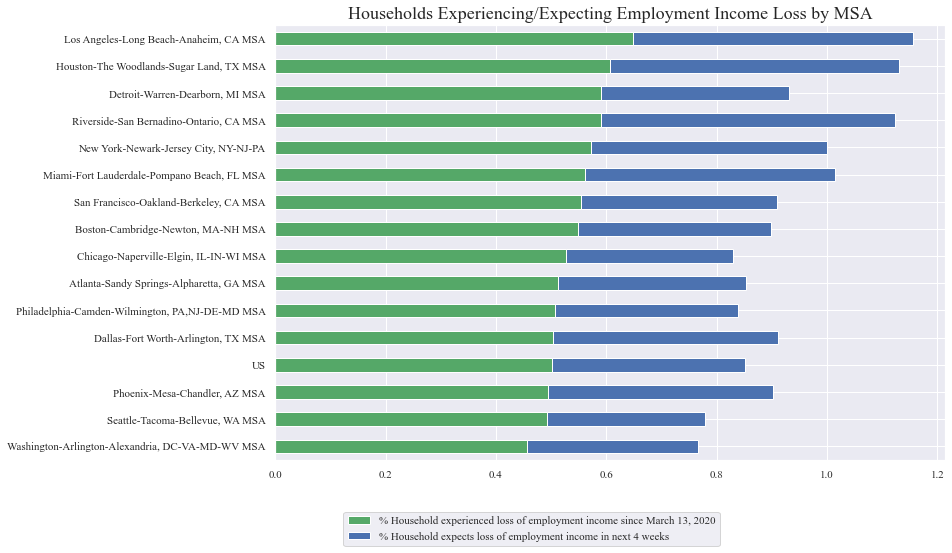

In [12]:
msa_dframe[graph_list[:2]].sort_values(
    by=["% Household experienced loss of employment income since March 13, 2020"]).plot.barh(
    stacked=True,figsize=(12,8))
plot.legend(bbox_to_anchor=(.1, -0.2), loc='lower left',
               ncol=1, borderaxespad=0.1)
plot.title('Households Experiencing/Expecting Employment Income Loss by MSA', fontsize=18)
#plot.savefig(f'../figures/EMP/ouseholds Experiencing/Expecting Employment Income Loss by MSA.png',bbox_inches='tight')

Text(0.5, 1.0, 'Households Not Experiencing/Expecting Employment Income Loss by MSA')

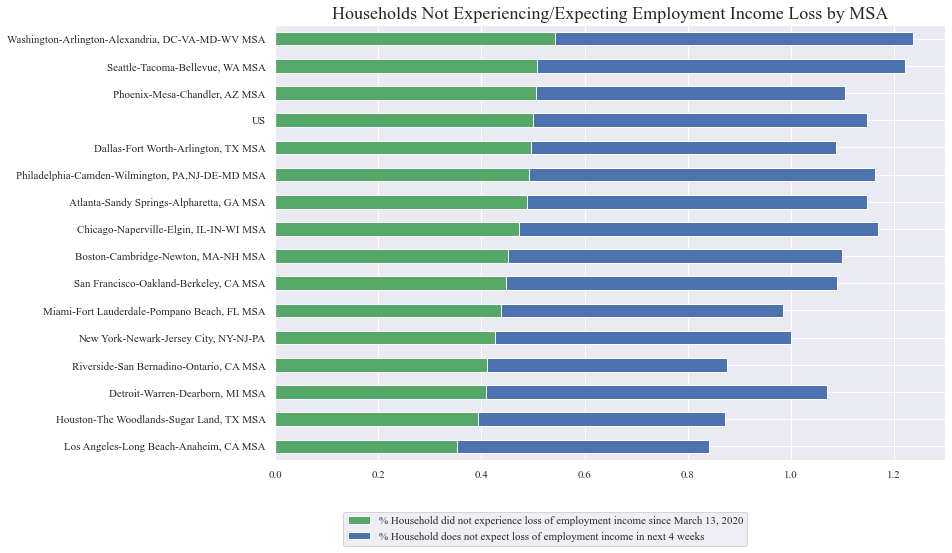

In [13]:
msa_dframe[graph_list[2:]].sort_values(
    by=["% Household did not experience loss of employment income since March 13, 2020"]).plot.barh(
    stacked=True,figsize=(12,8))
plot.legend(bbox_to_anchor=(.1, -0.2), loc='lower left',
               ncol=1, borderaxespad=0.1)
plot.title('Households Not Experiencing/Expecting Employment Income Loss by MSA', fontsize=18)
#plot.savefig(f'../figures/EMP/Households Not Experiencing/Expecting Employment Income Loss by MSA.png',bbox_inches='tight')

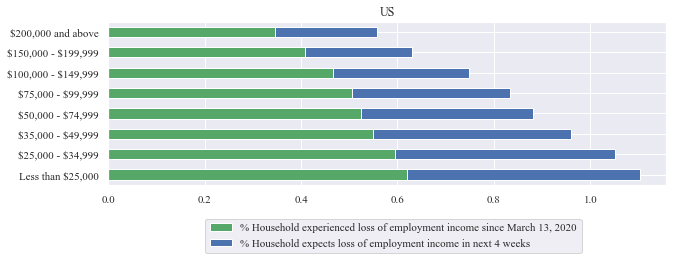

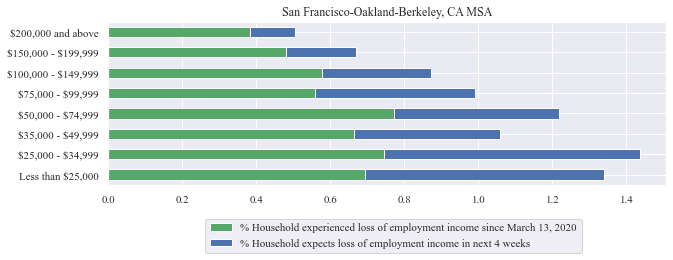

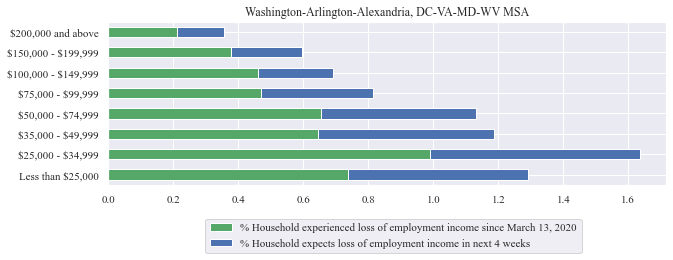

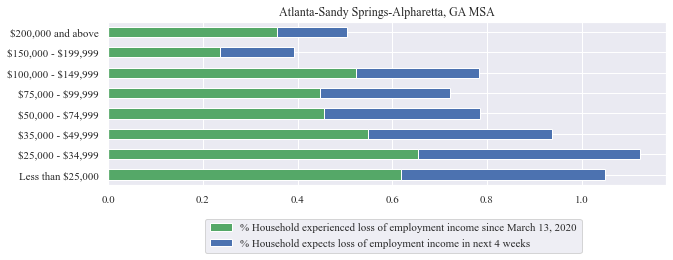

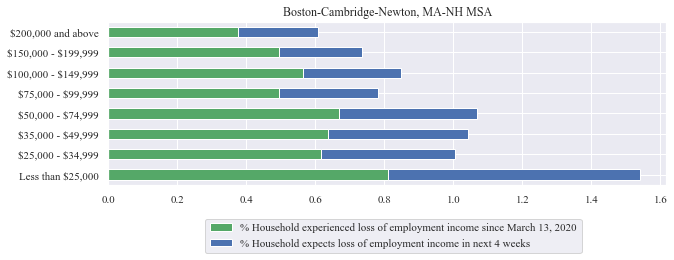

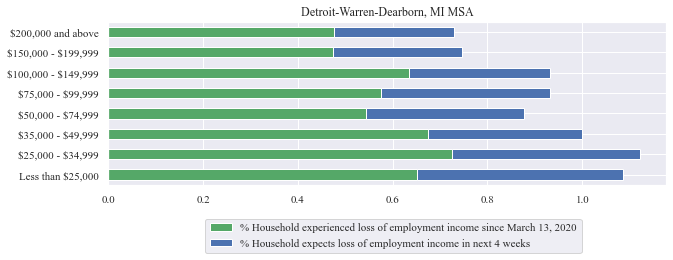

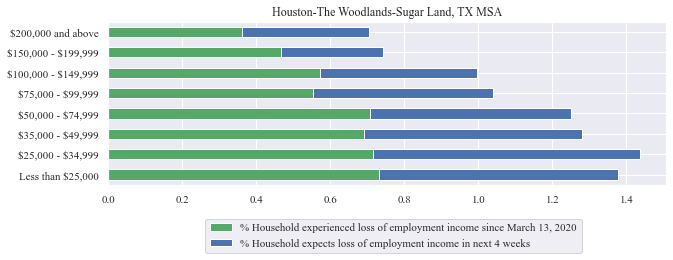

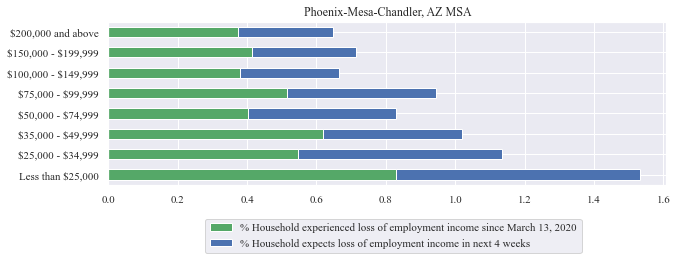

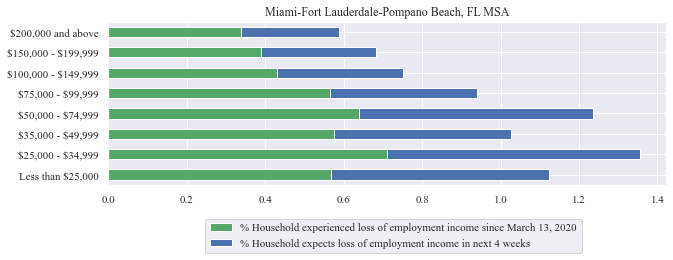

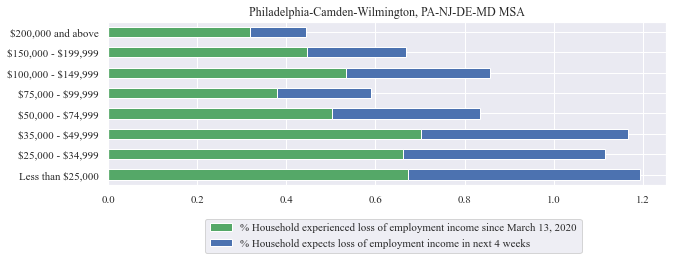

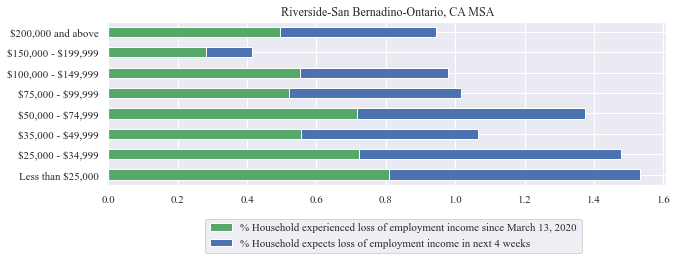

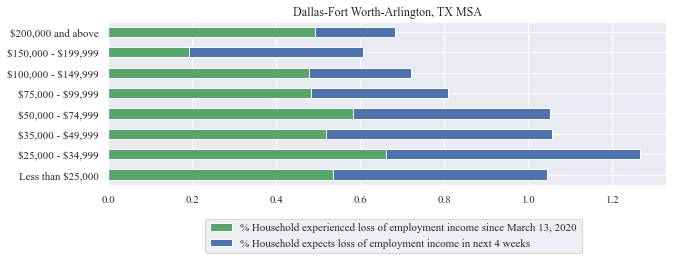

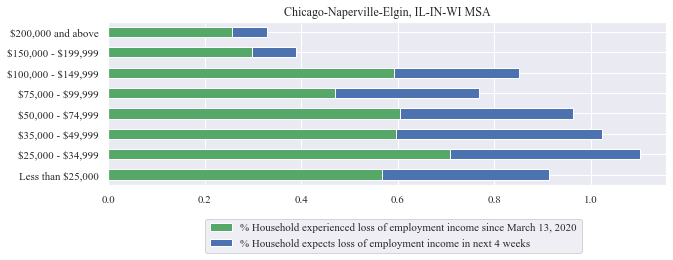

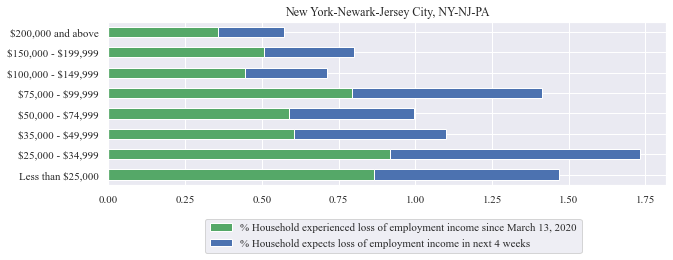

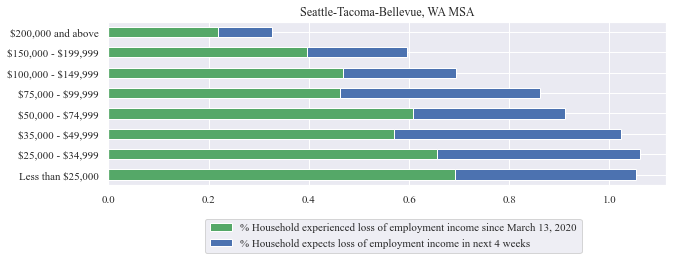

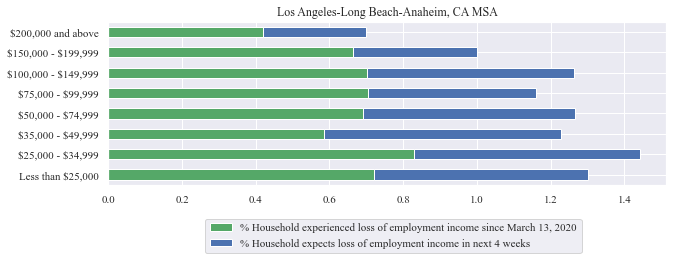

In [14]:
for places in income_dict.keys():
    income_dict[places][graph_list[:2]].plot.barh(
        stacked=True, figsize=(10,3))
    plot.legend(bbox_to_anchor=(.85, -.2), loc='best',
               ncol=1, borderaxespad=0.1)
    plot.title(places)
    #plot.savefig(f'../figures/EMP/income/Week11/HouseholdIncomeLossbyIncome-{places}',bbox_inches='tight',dpi=500)

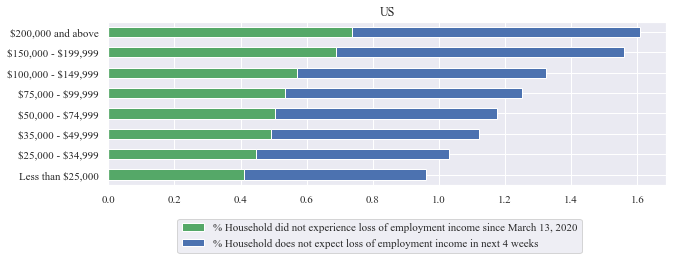

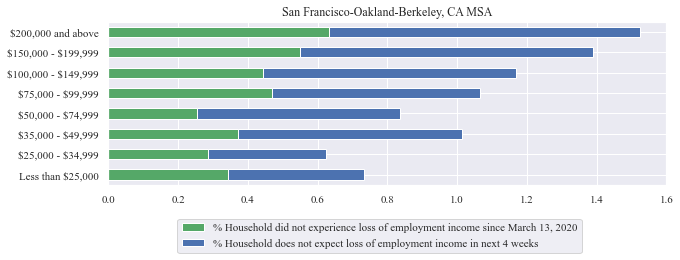

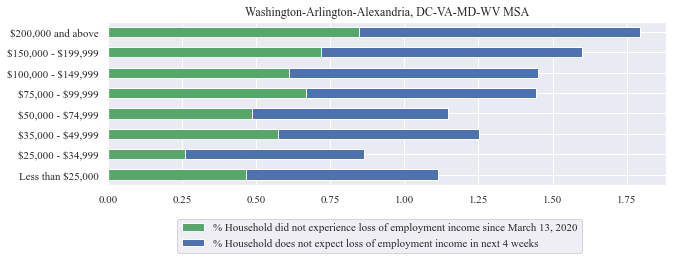

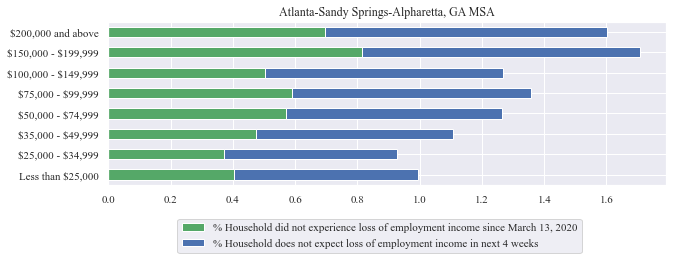

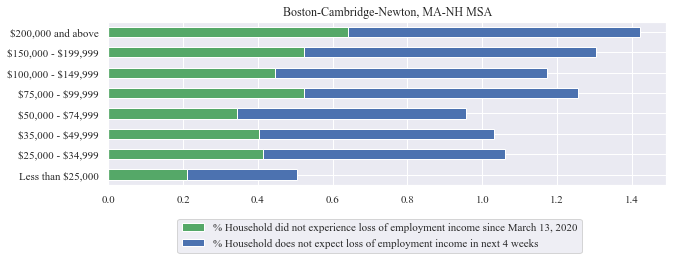

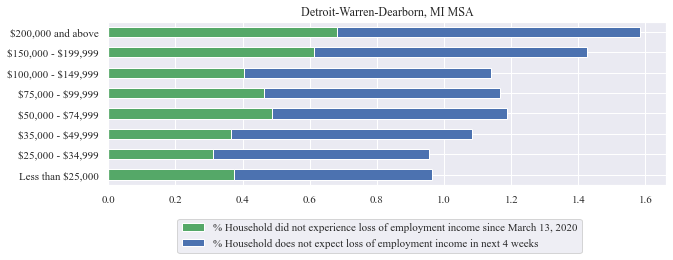

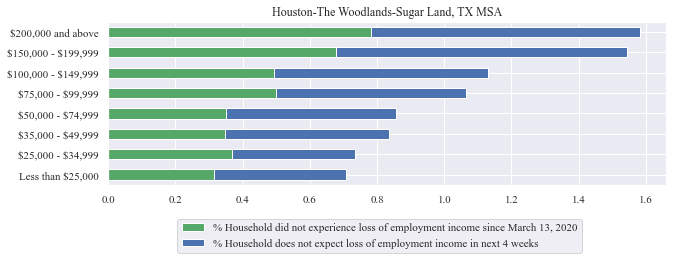

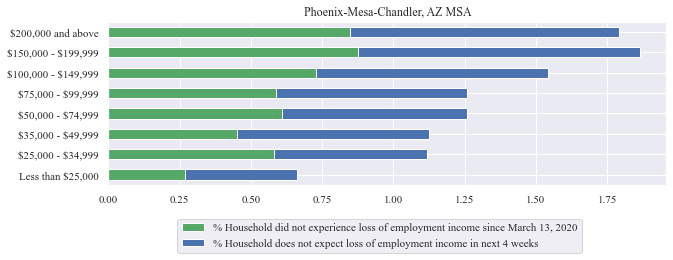

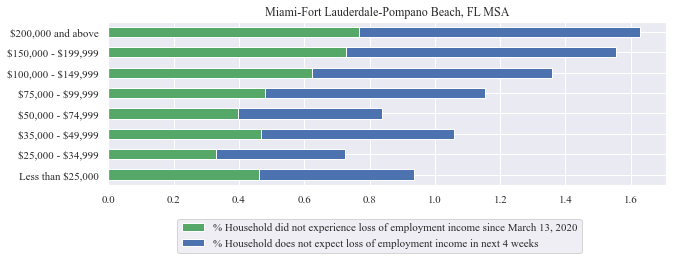

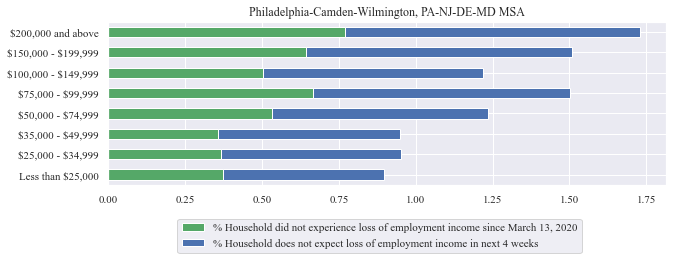

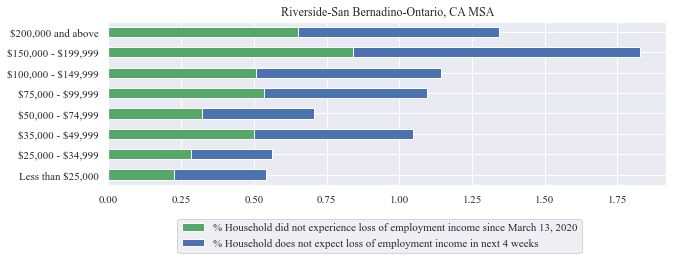

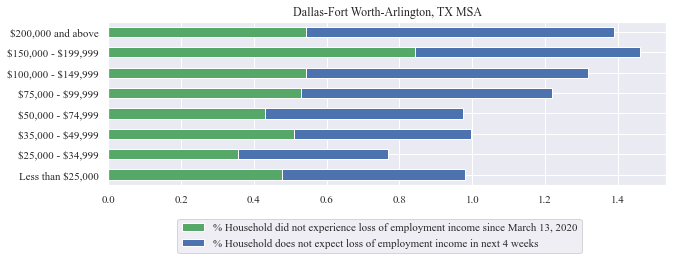

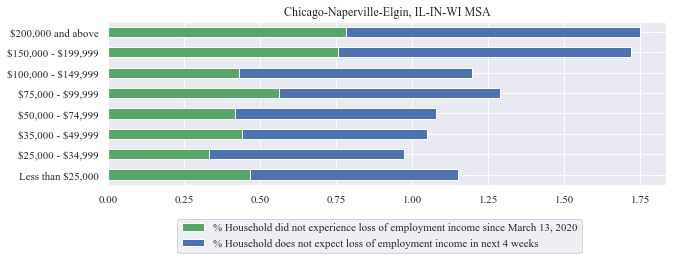

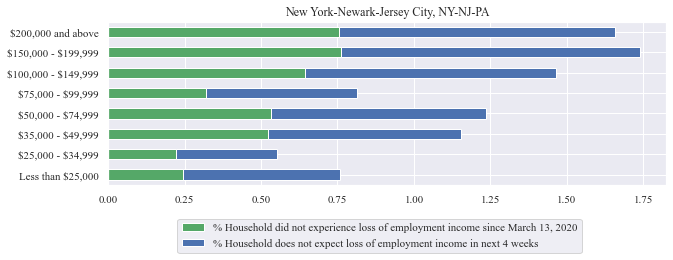

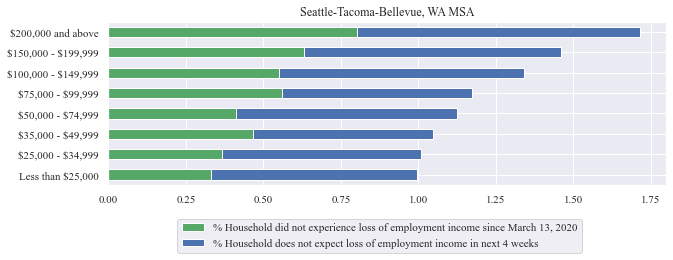

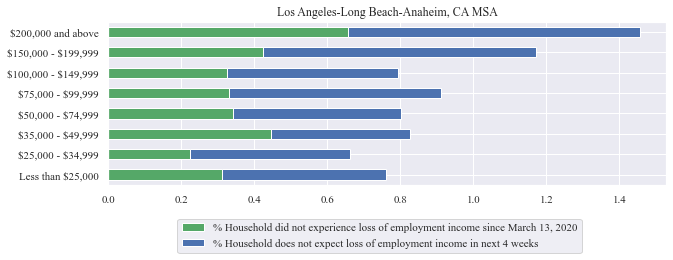

In [15]:
for places in income_dict.keys():
    income_dict[places][graph_list[2:]].plot.barh(
        stacked=True, figsize=(10,3))
    plot.legend(bbox_to_anchor=(.85, -.2), loc='best',
               ncol=1, borderaxespad=0.1)
    plot.title(places)
    #plot.savefig(f'../figures/EMP/income/Week11/NoHouseholdIncomeLossbyIncome-{places}',bbox_inches='tight',dpi=500)

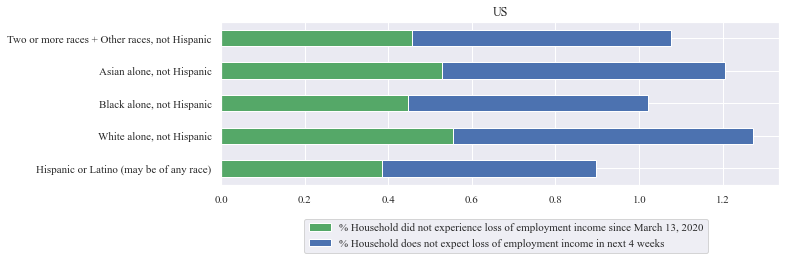

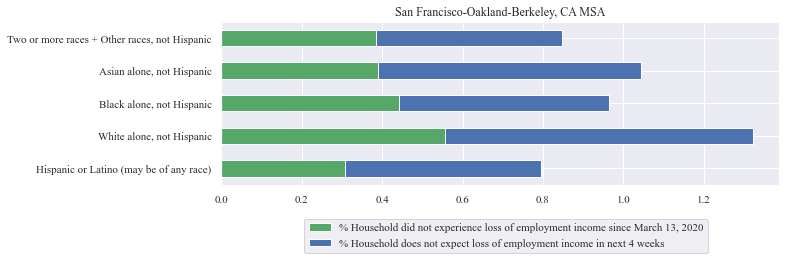

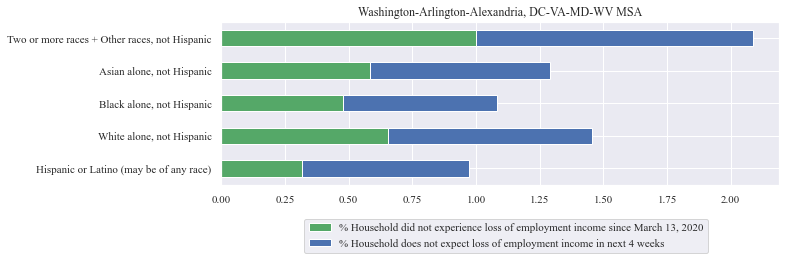

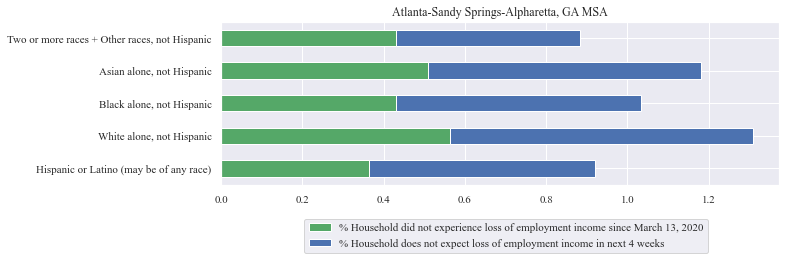

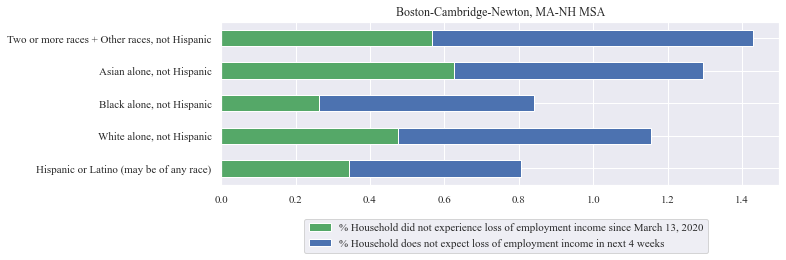

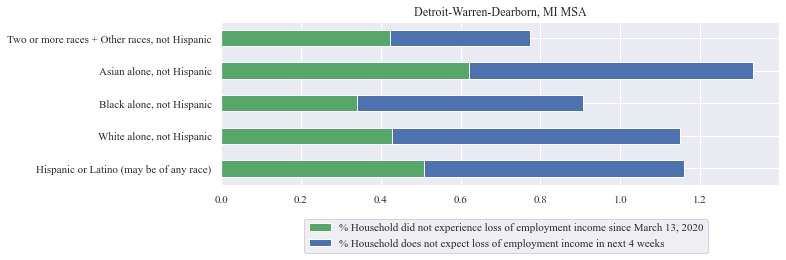

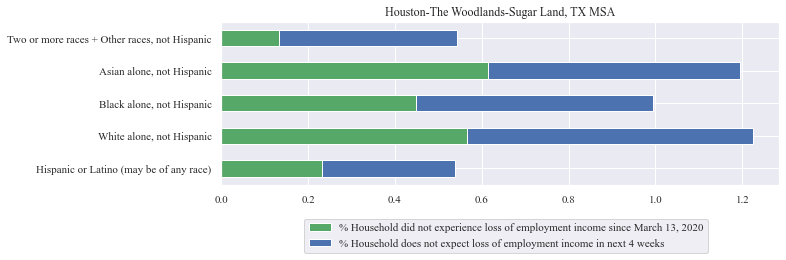

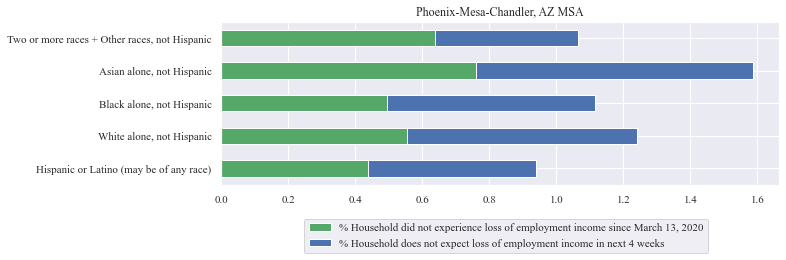

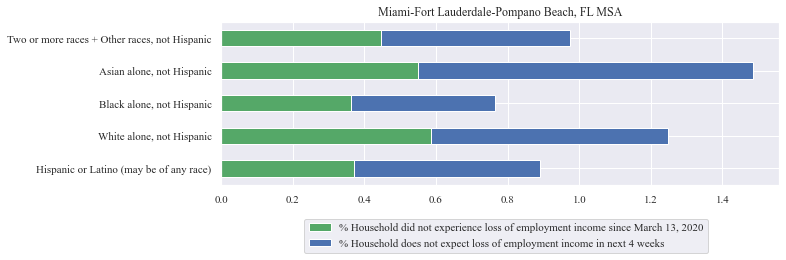

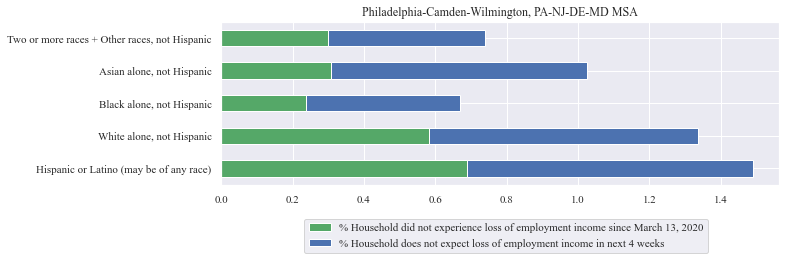

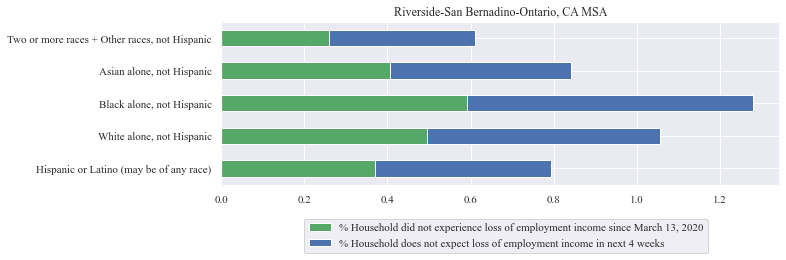

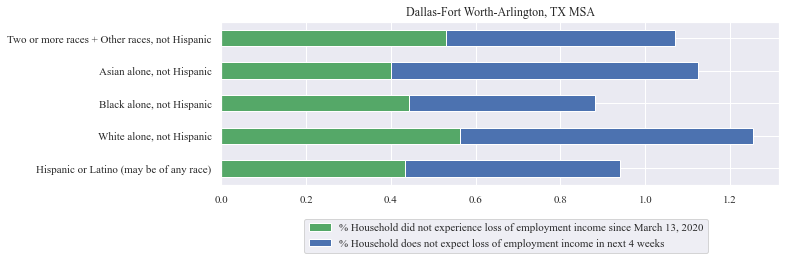

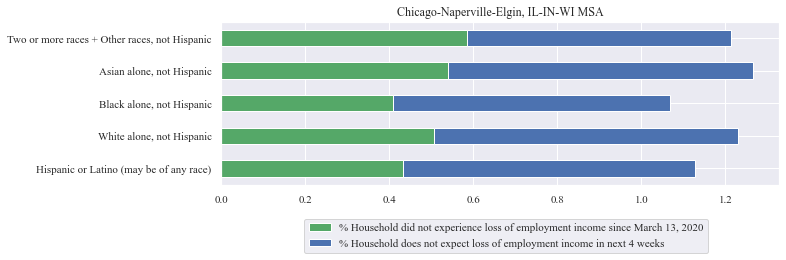

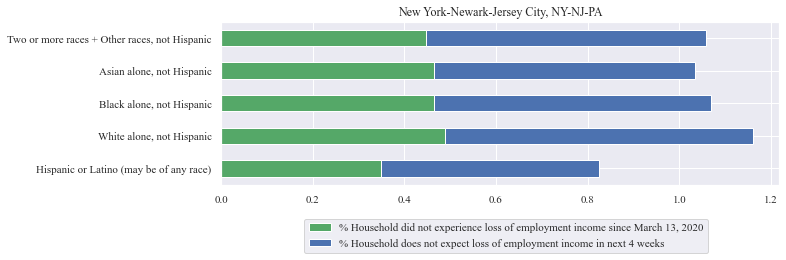

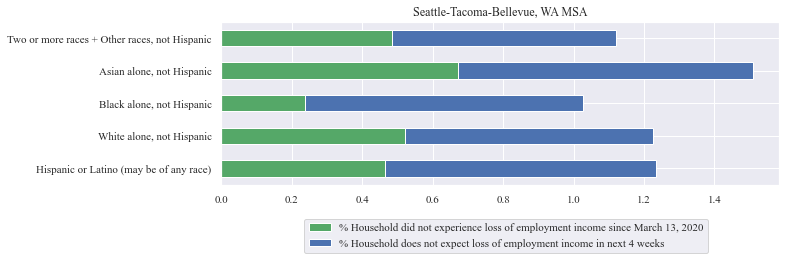

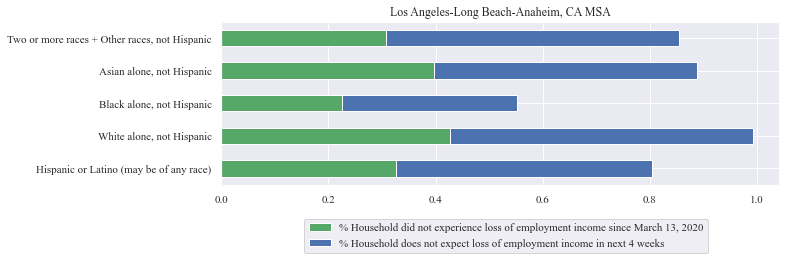

In [16]:
for places in race_dict.keys():
    race_dict[places][graph_list[2:]].plot.barh(stacked=True, figsize=(10,3))
    plot.legend(bbox_to_anchor=(0.875, -.2), loc='best',
               ncol=1, borderaxespad=0.1)
    plot.title(places)
    #plot.savefig(f'../figures/EDU/race/Week11/NoHouseholdIncomeLossbyRace-{places}',bbox_inches='tight',dpi=500)

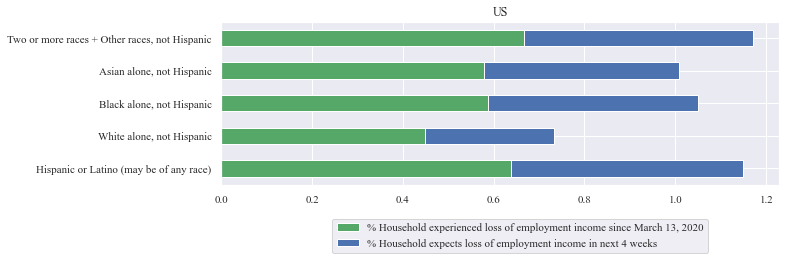

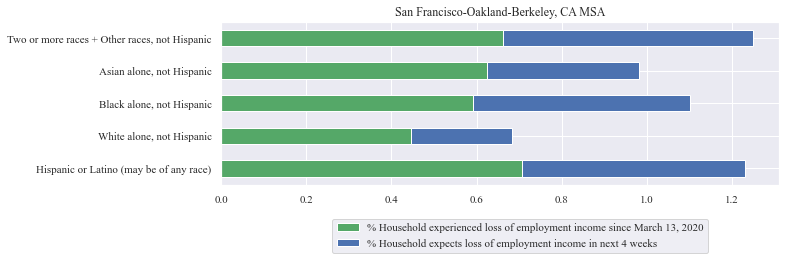

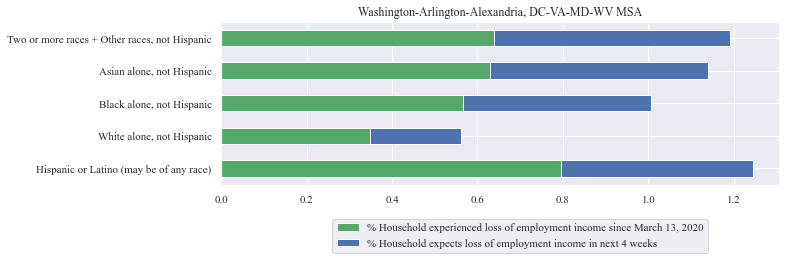

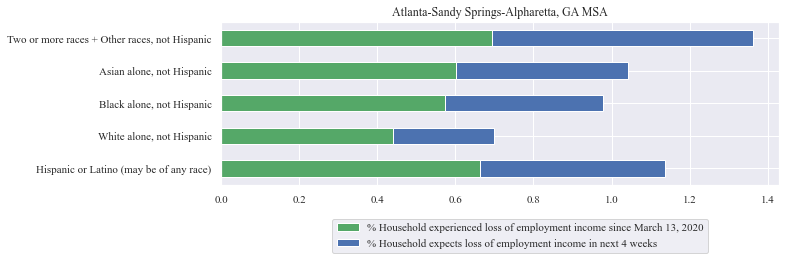

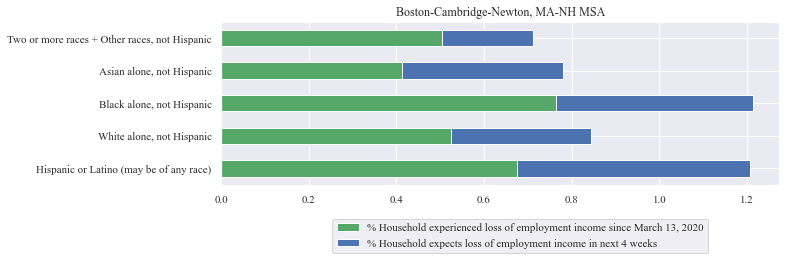

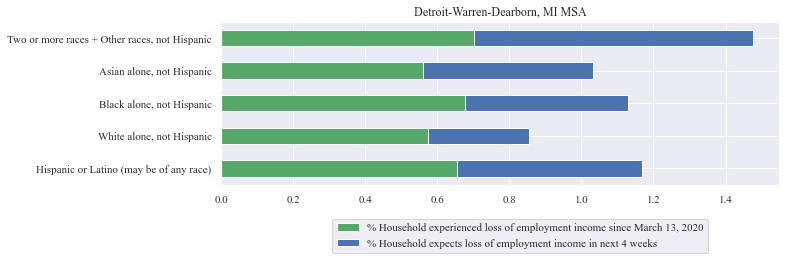

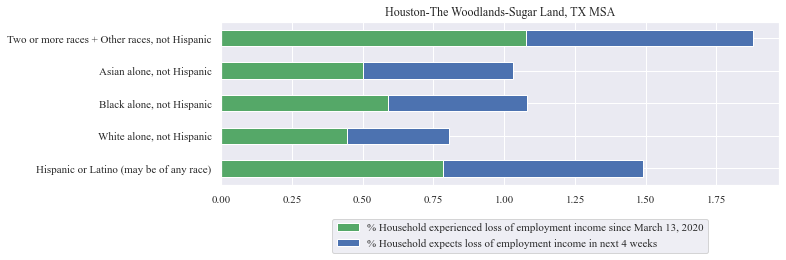

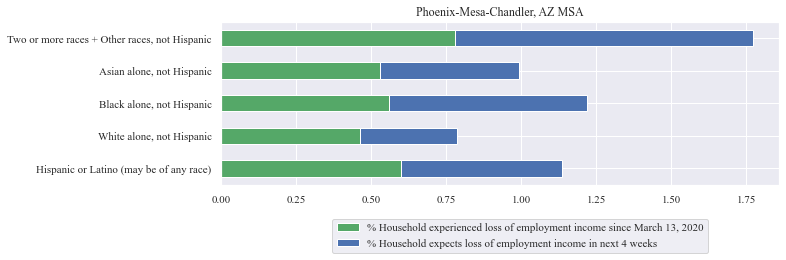

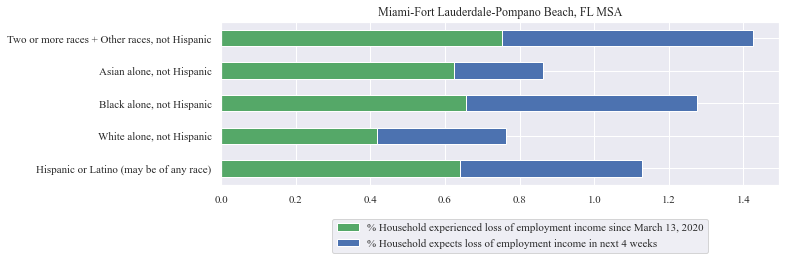

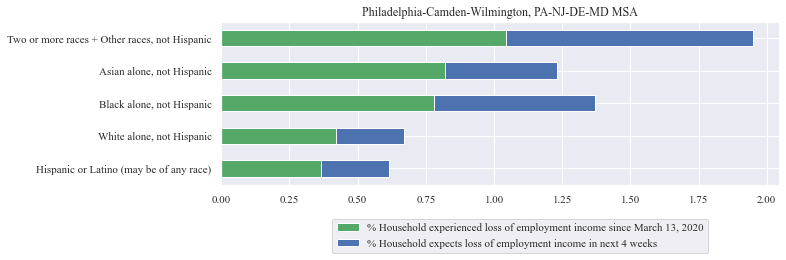

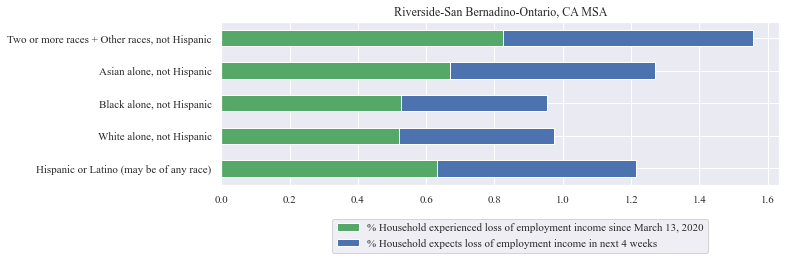

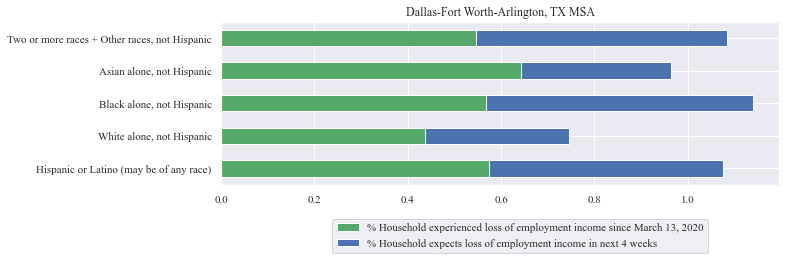

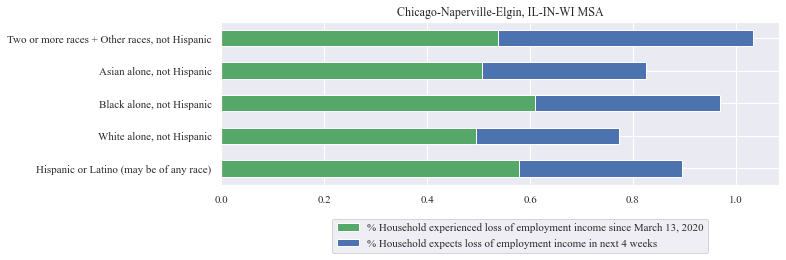

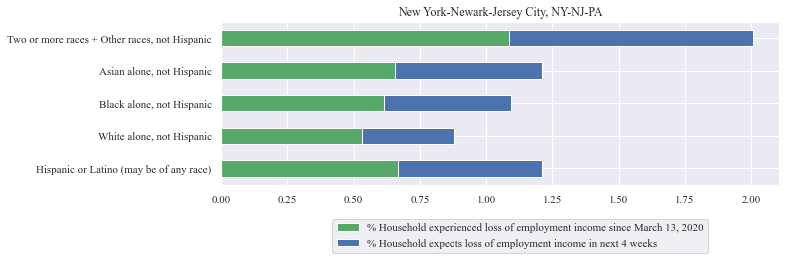

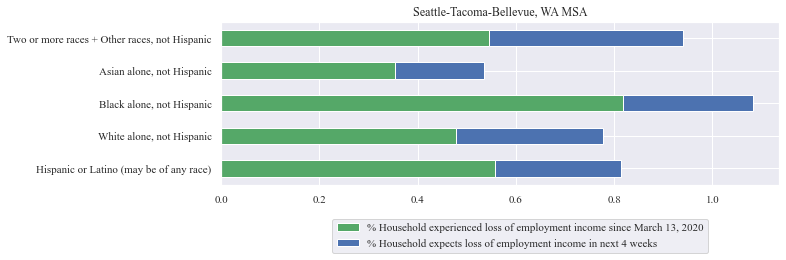

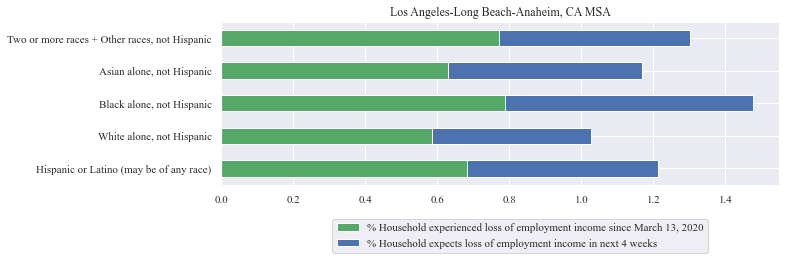

In [19]:
for places in race_dict.keys():
    race_dict[places][graph_list[:2]].plot.barh(stacked=True, figsize=(10,3))
    plot.legend(bbox_to_anchor=(0.875, -.2), loc='best',
               ncol=1, borderaxespad=0.1)
    plot.title(places)
    #plot.savefig(f'../figures/EDU/race/Week11/HouseholdIncomeLossbyRace-{places}',bbox_inches='tight',dpi=500)